# Project: Data Preprocessing
## Name: Melody Goldanloo
This Jupyter Notebook Starter File provides a basic outline for your solutions. For detailed instructions, please refer to the assignment on Canvas. Complete all your work for this project in this same Jupyter Notebook file, which you will submit:
- Code:
  - Insert your code where you see #Insert Code Here.
  - Ensure all code is well-commented and easy to understand.
  - Use clear and descriptive variable names.
- Questions:
  - Provide your answers to the guided questions in the same markdown cell as the questions.
  - Demonstrate a deep understanding of the concepts through thorough explanations and critical thinking.

In [17]:
#Example of supress warnings for Numpy version out of range (optional)
import warnings
warnings.filterwarnings("ignore", category=Warning)

#Some recommended libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

#Some recommended libraries for the text processing tasks
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# Part 1: Structured Data

## Step 1: Setup and Instructions
1. Load the `flights-small.csv` dataset using Pandas into a dataframe (Step 1)
2. Print the dataframe's first few elements using the `.head()` command to see what data you have (Also Step 1)
3. Complete the remaining tasks outlined in Canvas (Steps 2-8)
4. Answer the questions

In [18]:
flightData = pd.read_csv('flights-small.csv')
flightData.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013.0,1.0,1.0,517.0,515.0,2.0,830.0,819.0,11.0,...,1545,N14228,EWR,IAH,227.0,1400.0,5.0,15,1/1/13 5:00,United Air Lines Inc.
1,1,2013.0,1.0,1.0,533.0,529.0,4.0,850.0,830.0,20.0,...,1714,N24211,LGA,IAH,227.0,1416.0,5.0,29,1/1/13 5:00,United Air Lines Inc.
2,2,2013.0,1.0,1.0,542.0,540.0,2.0,923.0,850.0,33.0,...,1141,N619AA,JFK,MIA,160.0,1089.0,5.0,40,1/1/13 5:00,American Airlines Inc.
3,3,2013.0,1.0,1.0,544.0,545.0,-1.0,1004.0,1022.0,-18.0,...,725,N804JB,JFK,BQN,183.0,1576.0,5.0,45,1/1/13 5:00,JetBlue Airways
4,4,2013.0,1.0,1.0,554.0,600.0,-6.0,812.0,837.0,-25.0,...,461,N668DN,LGA,ATL,116.0,762.0,6.0,0,1/1/13 6:00,Delta Air Lines Inc.


## Step 2: Descriptive Statistics: Generate basic and advanced descriptive statistics.

In [82]:
flightData.describe()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,1138.000000,1136.0,1136.0,1137.000000,1133.000000,1137.000000,1128.000000,1124.000000,1126.000000,1122.000000,1138.000000,1124.000000,1136.000000,1137.000000,1138.000000
mean,568.500000,2013.0,1.0,1.260334,1225.375110,1218.647318,10.276596,1426.595196,1429.151865,11.058824,1796.316344,168.845196,1080.772007,11.943712,24.896309
std,328.656609,0.0,0.0,0.439010,491.850021,480.091232,40.868149,510.733800,495.123845,45.180736,1612.923048,95.342272,725.607586,4.784290,19.160062
min,0.000000,2013.0,1.0,1.000000,42.000000,500.000000,-15.000000,3.000000,5.000000,-59.000000,1.000000,24.000000,94.000000,5.000000,0.000000
25%,284.250000,2013.0,1.0,1.000000,813.000000,810.000000,-4.000000,1039.000000,1030.250000,-9.000000,493.500000,104.000000,541.000000,8.000000,5.000000
50%,568.500000,2013.0,1.0,1.000000,1123.000000,1125.000000,-1.000000,1325.500000,1330.000000,3.000000,1198.000000,150.000000,950.000000,11.000000,25.500000
75%,852.750000,2013.0,1.0,2.000000,1635.000000,1630.000000,8.000000,1853.250000,1840.000000,18.000000,3344.750000,227.250000,1400.000000,16.000000,40.000000
max,1137.000000,2013.0,1.0,2.000000,2356.000000,2359.000000,853.000000,2400.000000,2359.000000,851.000000,5742.000000,659.000000,4983.000000,23.000000,59.000000


In [83]:
flightData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1138 non-null   int64  
 1   year            1136 non-null   float64
 2   month           1136 non-null   float64
 3   day             1137 non-null   float64
 4   dep_time        1133 non-null   float64
 5   sched_dep_time  1137 non-null   float64
 6   dep_delay       1128 non-null   float64
 7   arr_time        1124 non-null   float64
 8   sched_arr_time  1126 non-null   float64
 9   arr_delay       1122 non-null   float64
 10  carrier         1135 non-null   object 
 11  flight          1138 non-null   int64  
 12  tailnum         1136 non-null   object 
 13  origin          1138 non-null   object 
 14  dest            1137 non-null   object 
 15  air_time        1124 non-null   float64
 16  distance        1136 non-null   float64
 17  hour            1137 non-null   f

In [84]:
flightData.isnull().sum()

id                 0
year               2
month              2
day                1
dep_time           5
sched_dep_time     1
dep_delay         10
arr_time          14
sched_arr_time    12
arr_delay         16
carrier            3
flight             0
tailnum            2
origin             0
dest               1
air_time          14
distance           2
hour               1
minute             0
time_hour          0
name               0
dtype: int64

## Step 3: Exploratory Data Visualization: Visualize data distributions and relationships.


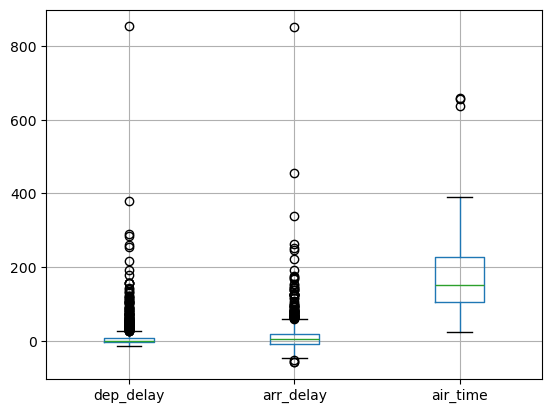

In [85]:
flightData.boxplot(column=['dep_delay', 'arr_delay', 'air_time'])
plt.show()

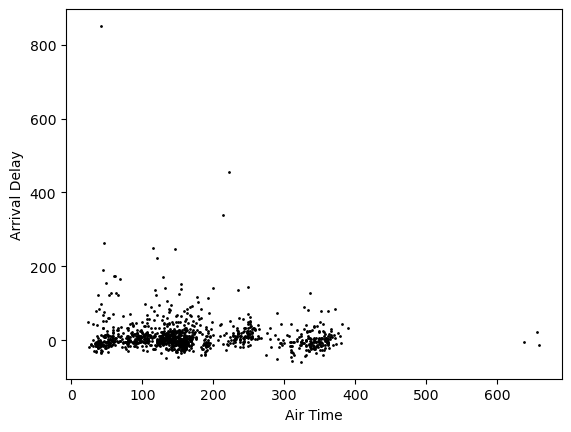

In [86]:
plt.scatter(flightData['air_time'], flightData['arr_delay'],c='black', s=1) 
plt.xlabel('Air Time')  
plt.ylabel('Arrival Delay')
plt.show()

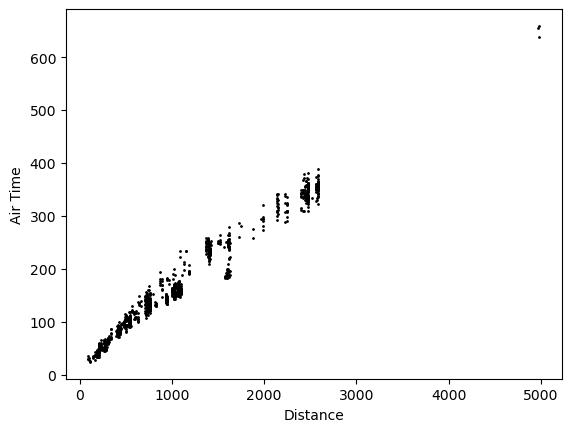

In [87]:
plt.scatter(flightData['distance'], flightData['air_time'],c='black', s=1) 
plt.xlabel('Distance')  
plt.ylabel('Air Time')
plt.show()

## Step 4: Data Cleansing: Handle missing values and outliers.

In [88]:
# Splitting Columns
numerical_cols = [    
    'year', 'month', 'day', 'dep_time', 'sched_dep_time', 
    'dep_delay', 'arr_time', 'sched_arr_time', 'arr_delay', 
    'flight', 'air_time', 'distance', 'hour', 'minute' ]
categorical_cols = ['carrier', 'tailnum', 'origin', 'dest', 'time_hour', 'name']

In [102]:
# Missing Values
# only around 20 null values out of 1100 data points- so, I'm dropping the null values.
flight_cleaned = flightData.fillna(flightData[numerical_cols].apply(lambda x: x.mode()[0]))
flight_cleaned = flight_cleaned.dropna(subset=categorical_cols)
flight_cleaned.isnull().sum()

id                0
year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
name              0
dtype: int64

In [74]:
# Removing Outliers
# cleaning outliers based on observed outliers from boxplots
flight_data_cleaned = flight_cleaned[(flight_cleaned['distance'] <= 4000) & (flight_cleaned['air_time'] <= 500) & (flight_cleaned['arr_delay'] <= 300) & (flight_cleaned['dep_delay'] <= 400)]
flight_data_cleaned.describe()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,1082.000000,1082.0,1082.0,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000
mean,582.123845,2013.0,1.0,1.271719,1234.947320,1227.587800,9.429760,1432.973198,1431.717190,10.350277,1790.194085,167.491682,1068.176525,12.025878,25.000000
std,324.363875,0.0,0.0,0.445052,492.481427,481.041895,30.763145,510.819403,496.038912,35.525606,1611.286833,92.567002,703.916729,4.799522,19.218208
min,0.000000,2013.0,1.0,1.000000,42.000000,500.000000,-15.000000,3.000000,5.000000,-59.000000,1.000000,24.000000,94.000000,5.000000,0.000000
25%,306.250000,2013.0,1.0,1.000000,817.000000,810.750000,-4.000000,1039.250000,1034.250000,-8.000000,493.500000,103.000000,535.000000,8.000000,5.000000
50%,584.500000,2013.0,1.0,1.000000,1130.000000,1130.500000,-1.000000,1330.500000,1333.000000,3.000000,1192.000000,149.000000,944.000000,11.000000,25.500000
75%,864.750000,2013.0,1.0,2.000000,1644.250000,1630.000000,8.000000,1856.750000,1840.000000,18.000000,3329.000000,227.000000,1400.000000,16.000000,40.000000
max,1137.000000,2013.0,1.0,2.000000,2356.000000,2359.000000,290.000000,2400.000000,2359.000000,338.000000,5742.000000,389.000000,2586.000000,23.000000,59.000000


## Step 5: Data Transformation: Normalize, standardize, and encode features.

In [111]:
# Normalize Data
cols_normalize = ['dep_delay', 'arr_delay', 'air_time', 'distance']
scaler = MinMaxScaler()

flight_data_cleaned[cols_normalize] = scaler.fit_transform(flight_data_cleaned[cols_normalize])
flight_data_cleaned.describe()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,1082.000000,1082.0,1082.0,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000
mean,582.123845,2013.0,1.0,1.271719,1234.947320,1227.587800,0.080098,1432.973198,1431.717190,0.174686,1790.194085,0.393128,0.390922,12.025878,25.000000
std,324.363875,0.0,0.0,0.445052,492.481427,481.041895,0.100863,510.819403,496.038912,0.089485,1611.286833,0.253608,0.282471,4.799522,19.218208
min,0.000000,2013.0,1.0,1.000000,42.000000,500.000000,0.000000,3.000000,5.000000,0.000000,1.000000,0.000000,0.000000,5.000000,0.000000
25%,306.250000,2013.0,1.0,1.000000,817.000000,810.750000,0.036066,1039.250000,1034.250000,0.128463,493.500000,0.216438,0.176966,8.000000,5.000000
50%,584.500000,2013.0,1.0,1.000000,1130.000000,1130.500000,0.045902,1330.500000,1333.000000,0.156171,1192.000000,0.342466,0.341091,11.000000,25.500000
75%,864.750000,2013.0,1.0,2.000000,1644.250000,1630.000000,0.075410,1856.750000,1840.000000,0.193955,3329.000000,0.556164,0.524077,16.000000,40.000000
max,1137.000000,2013.0,1.0,2.000000,2356.000000,2359.000000,1.000000,2400.000000,2359.000000,1.000000,5742.000000,1.000000,1.000000,23.000000,59.000000


In [114]:
# Categorical Features
flight_data_cleaned['name'].value_counts()
flights_encoded = pd.get_dummies(flight_data_cleaned, columns=['name'])
flights_encoded.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,name_Delta Air Lines Inc.,name_Endeavor Air Inc.,name_Envoy Air,name_ExpressJet Airlines Inc.,name_Frontier Airlines Inc.,name_JetBlue Airways,name_Southwest Airlines Co.,name_US Airways Inc.,name_United Air Lines Inc.,name_Virgin America
0,0,2013.0,1.0,1.0,517.0,515.0,0.055738,830.0,819.0,0.176322,...,False,False,False,False,False,False,False,False,True,False
1,1,2013.0,1.0,1.0,533.0,529.0,0.062295,850.0,830.0,0.198992,...,False,False,False,False,False,False,False,False,True,False
2,2,2013.0,1.0,1.0,542.0,540.0,0.055738,923.0,850.0,0.231738,...,False,False,False,False,False,False,False,False,False,False
3,3,2013.0,1.0,1.0,544.0,545.0,0.045902,1004.0,1022.0,0.103275,...,False,False,False,False,False,True,False,False,False,False
4,4,2013.0,1.0,1.0,554.0,600.0,0.029508,812.0,837.0,0.085642,...,True,False,False,False,False,False,False,False,False,False


## Step 6: Dimensionality Reduction: Apply PCA and other techniques to reduce dimensionality.


In [122]:
# PCA
X = flight_data_cleaned[cols_normalize]

pca = PCA()
pca.fit(X)
X_pca = pca.transform(X)
pca.fit(flight_data_cleaned[cols_normalize])

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

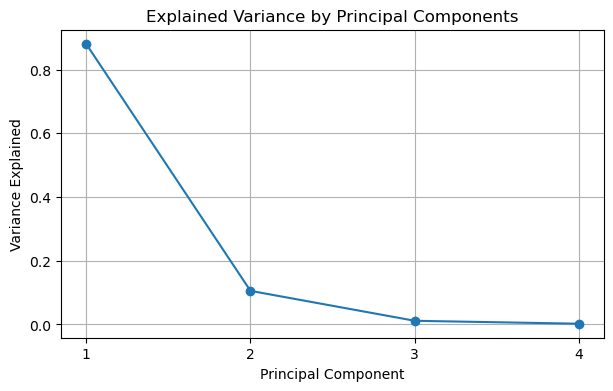

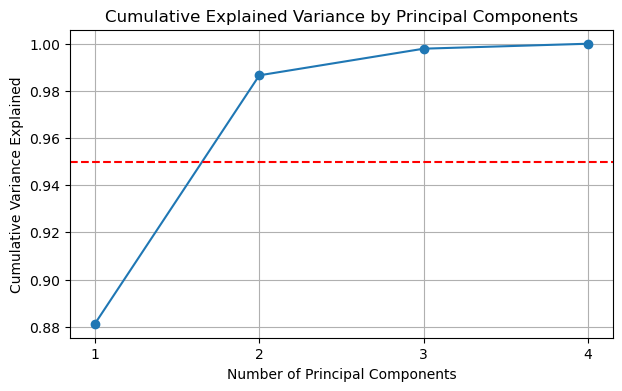

Number of components to retain for 95% variance: 2


In [126]:
plt.figure(figsize=(7, 4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()

cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(7, 4))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.axhline(y=0.95, color='r', linestyle='--')  # 95% variance
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid()
plt.show()

# Step 6: Determine the number of components to retain
n_components_to_retain = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Number of components to retain for 95% variance: {n_components_to_retain}')

## Step 7: Data Aggregation: Perform aggregation.

In [128]:
grouped_data = flights_encoded.groupby(['year', 'month']).agg({
    'dep_delay': 'mean', 
    'arr_delay': 'mean', 
    'air_time': 'sum',    
    'distance': 'sum',    
    'flight': 'count'     
}).reset_index()

grouped_data.rename(columns={
    'dep_delay': 'mean_dep_delay',
    'arr_delay': 'mean_arr_delay',
    'air_time': 'total_air_time',
    'distance': 'total_distance',
    'flight': 'flight_count'
}, inplace=True)

grouped_data

,year,month,mean_dep_delay,mean_arr_delay,total_air_time,total_distance,flight_count
0,2013.0,1.0,0.080098,0.174686,425.364384,422.977127,1082


## Step 8: Data Splitting (Train, Test, Validate): Split the dataset for training, testing, and validation.


In [130]:
train_val_data, test_data = train_test_split(flight_data_cleaned, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_val_data, test_size=0.25, random_state=42)

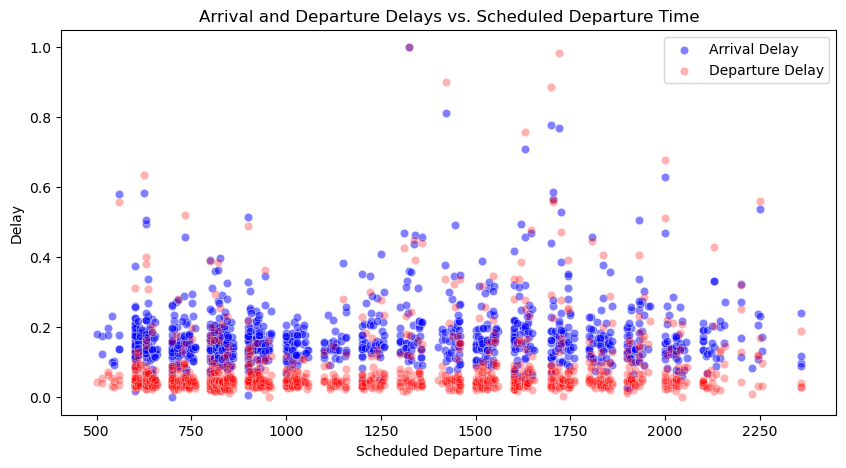

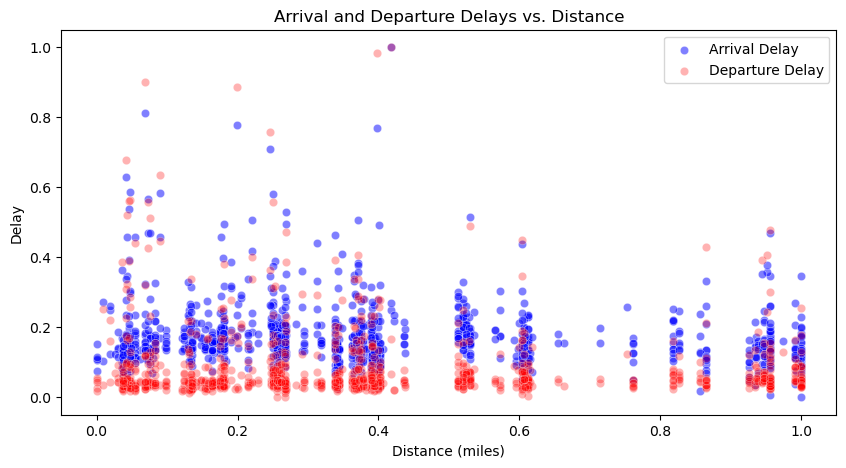

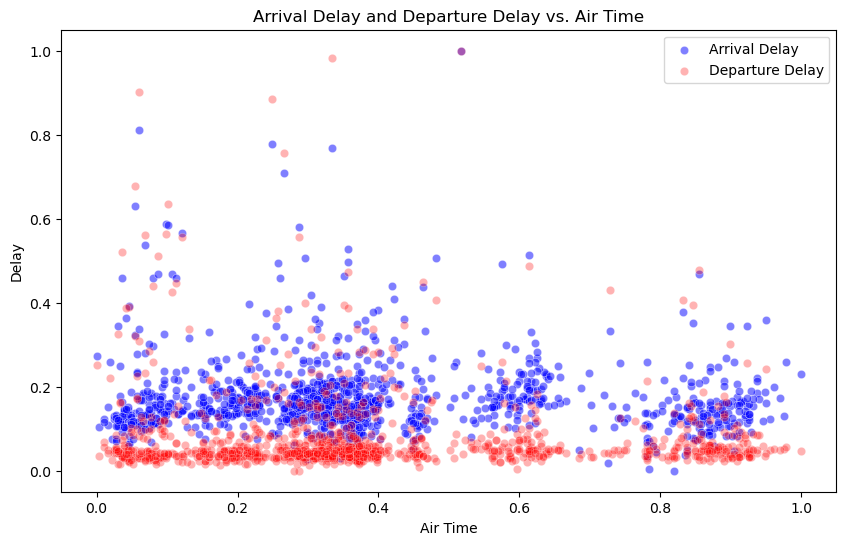

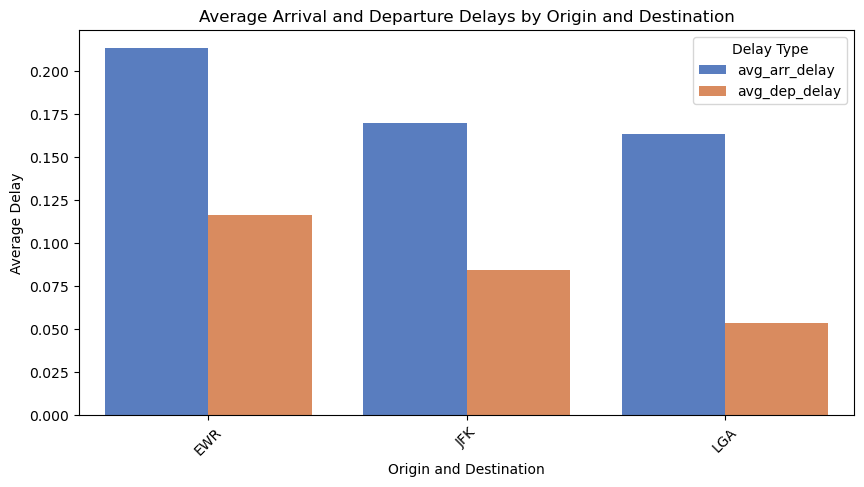

In [198]:
#flightData['month'].value_counts()

#time
plt.figure(figsize=(10, 5))
sns.scatterplot(x='sched_dep_time', y='arr_delay', data=flight_data_cleaned, color='blue', label='Arrival Delay', alpha=0.5)
sns.scatterplot(x='sched_dep_time', y='dep_delay', data=flight_data_cleaned, color='red', label='Departure Delay', alpha=0.3)
plt.title('Arrival and Departure Delays vs. Scheduled Departure Time')
plt.xlabel('Scheduled Departure Time')
plt.ylabel('Delay')
plt.legend()
plt.show()

#distance
plt.figure(figsize=(10, 5))
sns.scatterplot(x='distance', y='arr_delay', data=flight_data_cleaned, color='blue', label='Arrival Delay', alpha=0.5)
sns.scatterplot(x='distance', y='dep_delay', data=flight_data_cleaned, color='red', label='Departure Delay', alpha=0.3)
plt.title('Arrival and Departure Delays vs. Distance')
plt.xlabel('Distance (miles)')
plt.ylabel('Delay')
plt.legend()
plt.show()

# air time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='air_time', y='arr_delay', data=flight_data_cleaned, color='blue', label='Arrival Delay', alpha=0.5)
sns.scatterplot(x='air_time', y='dep_delay', data=flight_data_cleaned, color='red', label='Departure Delay', alpha=0.3)
plt.title('Arrival Delay and Departure Delay vs. Air Time')
plt.xlabel('Air Time')
plt.ylabel('Delay')
plt.legend()
plt.show()

#origin & destination
mean_delays = flight_data_cleaned.groupby(['origin', 'dest']).agg(
    avg_arr_delay=('arr_delay', 'mean'),
    avg_dep_delay=('dep_delay', 'mean')
).reset_index()

mean_delays_melted = mean_delays.melt(id_vars=['origin', 'dest'], value_vars=['avg_arr_delay', 'avg_dep_delay'], 
                                       var_name='delay_type', value_name='average_delay')
plt.figure(figsize=(10, 5))
sns.barplot(data=mean_delays_melted, x='origin', y='average_delay', hue='delay_type', palette='muted', ci=None)
plt.title('Average Arrival and Departure Delays by Origin and Destination')
plt.xlabel('Origin and Destination')
plt.ylabel('Average Delay')
plt.legend(title='Delay Type')
plt.xticks(rotation=45) 
plt.show()

#### Structured Data Processing Questions
1. Why is it important to perform both descriptive statistics and exploratory data visualization before beginning the data preprocessing steps? Explain how these steps help in understanding the data better.
It's important to perform both descriptive statistics and exploratory data visualization before beginning the data preprocessing because it helps to gain an comprehensive understanding of the dataset, identifying and dealing with data quality issues, understanding relationships between the variables, and to ultimately guiding decisions about feature selection and preprocessing methods.

2. When handling missing values, under what circumstances would you choose to remove rows/columns with missing data versus imputing missing values? Provide a specific example to support your answer.
When handling missing values, I first take note of how many missing values there are and how many data values are in each column or the whole data set. If its only a small fraction of null values compared to a larger data set I may opt to simply remove those rows. However, with numerical columns I may replace with the mean, mode, preceding or following value. For categorical columns I may opt to replace with the mode or some string like "[variable] not available".

4. In the provided flight dataset, identify the top three features that you believe would have the most significant impact on predicting flight delays. Justify your selection based on exploratory data analysis.
The top features that would likely predict flight delays would be the month (i.e., season), time, air time, distance, and location. It appears the month value is only 1.0 though, oddly, so not that one. It appears there may be some times more than others that experience more delays. Contrary to what I thought, more air time did not mean a higher variability in delay time. It did appear that there were more delays based on the origin/destination, the most being evidently at EWR.

5. Describe a scenario where feature engineering could improve the performance of a model trained on the flight dataset. Propose at least two new features that could be engineered and explain why they might be beneficial.
In the flight dataset, feature engineering could improve model performance by creating features that capture patterns in the data. For instance, engineering a ‘time_of_day’ feature that categorizes flight times into morning, afternoon, evening, and night could help the model account for varying traffic patterns and delays associated with different times. Additionally, creating a ‘season’ feature based on the flight date could capture seasonal trends in flight delays, as certain times of the year may experience more delays due to weather or holiday travel. These features can provide the model with more contextual information, improving its ability to predict flight delays accurately. Not sure if this would still be considered feature engineering, but maybe based on the location and date/time, getting the weather and also using that to train a model would be super helpful I think.

7. What was the impact of PCA, normalization and dummies, were these useful applications in this code, would you do them again?
The application of PCA reduced the dimensionality of the dataset while retaining most of the variance, which helps simplify the model and enhance interpretability. Normalization ensured that all features contributed equally to the model by scaling them to a uniform range. Using dummy variables for categorical features allowed the model to incorporate non-numeric data effectively. Overall, these preprocessing steps were useful and would be worth applying again, as they help in building a more efficient model.


# Part 2: Unstructured Data

## Instructions
1. Use the provided code and sample data as a starting place
2. Run the code and print out the `reviews` list to ensure you are ready to clean and preprocess the text data
3. Complete the remaining tasks outlined in Canvas 
4. Answer the questions

In [207]:
## PROVIDED CODE BEGIN
# Ensure NLTK resources are downloaded, comment out if needed after run once
nltk.download('punkt')
nltk.download('stopwords')

# Sample text data
reviews = [
    "This movie was fantastic! The plot was engaging and the characters were well-developed.",
    "I did not enjoy this movie. The storyline was boring and the acting was subpar.",
    "An average film with some good moments. Not the best, but worth watching."
]

def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return tokens

# Preprocess all reviews
preprocessed_reviews = [' '.join(preprocess_text(review)) for review in reviews]
## PROVIDED CODE END

print(reviews)

print(preprocessed_reviews)

['This movie was fantastic! The plot was engaging and the characters were well-developed.', 'I did not enjoy this movie. The storyline was boring and the acting was subpar.', 'An average film with some good moments. Not the best, but worth watching.']
['movie fantastic plot engaging characters welldeveloped', 'enjoy movie storyline boring acting subpar', 'average film good moments best worth watching']


[nltk_data] Downloading package punkt to /home/m10925187/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/m10925187/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Unstructured Data Processing Questions
1. Why do you think it is important that we apply some transformations to our data like removing punctuation and making our text lowercase? \
Applying transformations like removing punctuation and making text lowercase is important for standardizing the data, which helps eliminate inconsistencies and variations that could impact analysis or model training. These preprocessing steps facilitate more effective text analysis and modeling by ensuring that similar words are treated equivalently.

2. If we did not do this, what would happen? \
If we did not remove punctuation and make the text lowercase, the analysis could produce misleading results due to treating variations of the same word (such as, “Movie” vs. “movie” or “fantastic!” vs. “fantastic”) as different words. This could lead to inflated counts of unique words, affecting the performance of text analysis models and ultimately resulting in less accurate insights and predictions.